In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

In [3]:
def load_audio_files(audio_files):
    y_list = []
    #returns the list of numpy arrays for the audio files for sr=22500 trimmed at 20db
    for audio_file in audio_files: #14 min for the 1068 songs
        y, sr = librosa.load(audio_file, sr=22500)
        y_trimmed, _ = librosa.effects.trim(y, top_db = 20)
        y_list.append(y_trimmed)

    return y_list

In [4]:
audio_files = glob('../downloads_wav_1/*')
y_list = load_audio_files(audio_files)

In [49]:
len(audio_files) #there's another 534 on the ../downloads_wav_2

534

In [48]:
audio_path = audio_files[7]
y, sr = librosa.load(audio_path, sr=None)

# Slice first 30 seconds
y_trimmed = y[:sr * 30]

ipd.Audio(y_trimmed, rate=sr)

In [58]:
print(f'y: {y_list[0][:10]}')
print(f'shape y: {len(y_list), len(y_list[0])}')
print(f'sr: {sr}')

y: [ 0.01714913  0.00163316 -0.0206297  -0.03303209 -0.02024587 -0.006657
  0.00952081  0.0265674   0.01735067  0.00234034]
shape y: (534, 4344832)
sr: 22500


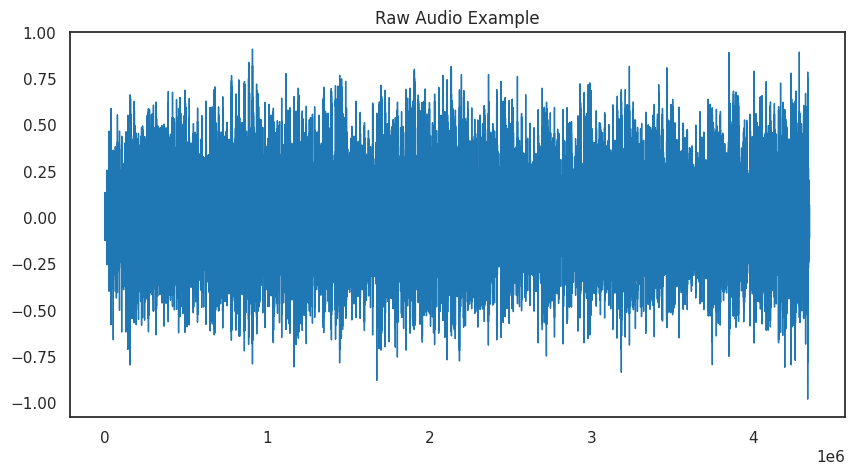

In [59]:
pd.Series(y_list[0]).plot(figsize=(10,5),
                  lw=1,
                  title='Raw Audio Example',
                 color = color_pal[0])
plt.show()

In [60]:
y_trimmed, _ = librosa.effects.trim(y_list[0], top_db = 20)

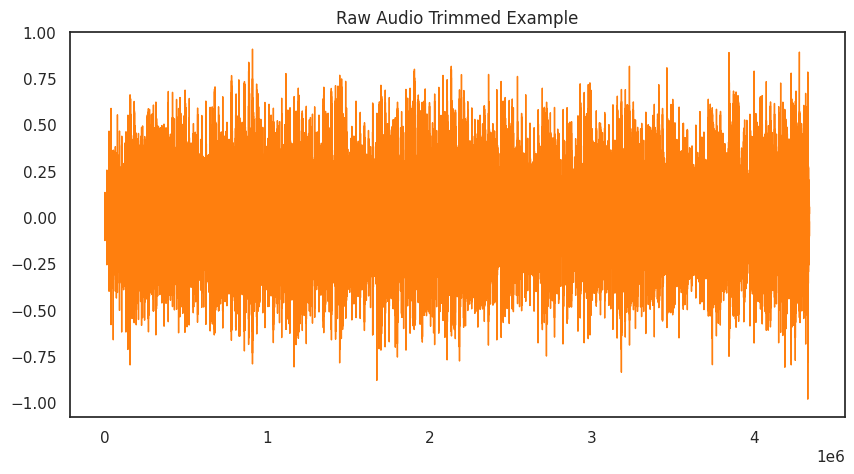

In [61]:
pd.Series(y_trimmed).plot(figsize=(10,5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color = color_pal[1])
plt.show()

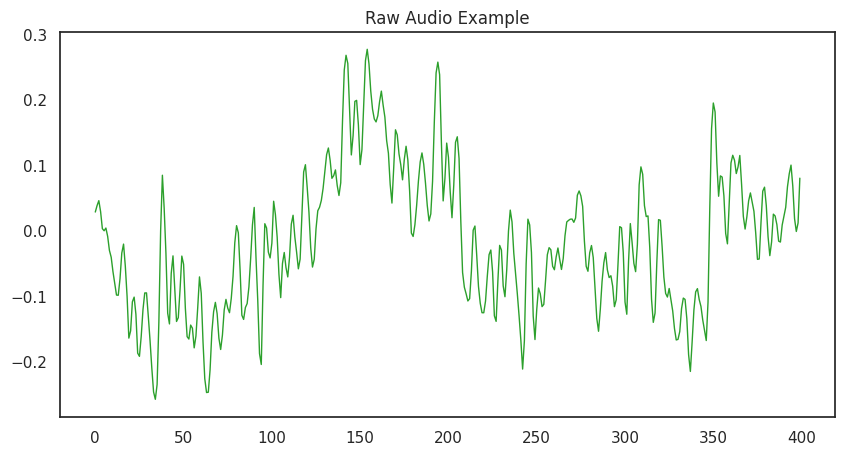

In [62]:
pd.Series(y_list[0][600000:600400]).plot(figsize=(10,5),
                  lw=1,
                  title='Raw Audio Example',
                 color = color_pal[2])
plt.show()

In [63]:
D = librosa.stft(y_list[0])
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)
S_db.shape

(1025, 8487)

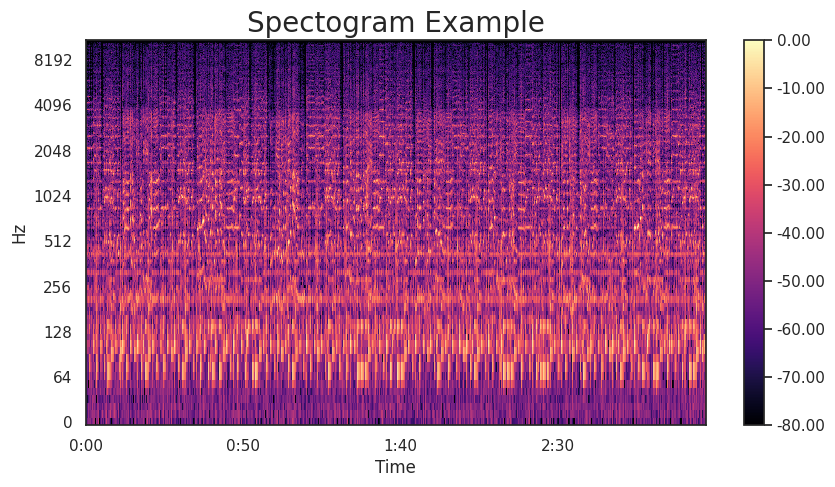

In [64]:
#Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [65]:
S = librosa.feature.melspectrogram(y=y_list[0], sr=sr, n_mels=128)
print(S.shape)
S_db_mel = librosa.amplitude_to_db(S_db, ref = np.max)

(128, 8487)


In [91]:
audio_files[:17]

['downloads_wav_1/40 palhkaria apo thn Leivadia.wav',
 'downloads_wav_1/Adeioi Topoi.wav',
 'downloads_wav_1/Adiaforw.wav',
 'downloads_wav_1/Adynaton na koimithw.wav',
 'downloads_wav_1/Aeriko.wav',
 'downloads_wav_1/Afierwmeno.wav',
 'downloads_wav_1/Afilotimh.wav',
 'downloads_wav_1/Afou sou to eipa.wav',
 'downloads_wav_1/Afou to thes.wav',
 'downloads_wav_1/Agapaw kai adiaforw.wav',
 'downloads_wav_1/Agapaw san paidi.wav',
 'downloads_wav_1/Agaph pou egines dikopo maxairi.wav',
 'downloads_wav_1/Agaph.wav',
 'downloads_wav_1/Agaphmenh.wav',
 'downloads_wav_1/Agios erwtas.wav',
 'downloads_wav_1/Agios Frevrouarios.wav',
 'downloads_wav_1/Agios Vasilhs.wav']

In [10]:
def mel_spec(y, sr=22050):
    y = np.array(y)
    mel_spec = librosa.feature.melspectrogram(
        y=y, 
        sr=sr, 
        n_fft=2048,
        hop_length=512,   # higher hop length lower time resolution
        n_mels=128
        )           
    # Convert to log scale
    S_db = librosa.power_to_db(mel_spec, ref=np.max)
    return S_db

In [69]:
y_list[1].shape

(4235264,)

### Mel Spectrogram Examples for different song genres

In [83]:
modern_folk_song = y_list[2] #moderno laiko = modern folk

In [84]:
modern_folk_S_db_mel = mel_spec(modern_folk_song)

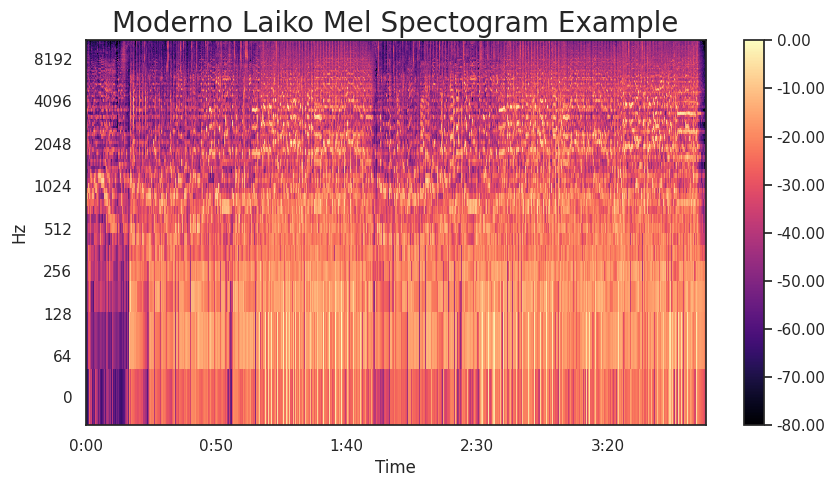

In [85]:
#Plot the mel spectrogram for audio track [2] - adiaforw
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(modern_folk_S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Moderno Laiko Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [8]:
rock_song = y_list[7]

In [11]:
rock_S_db_mel = mel_spec(rock_song)

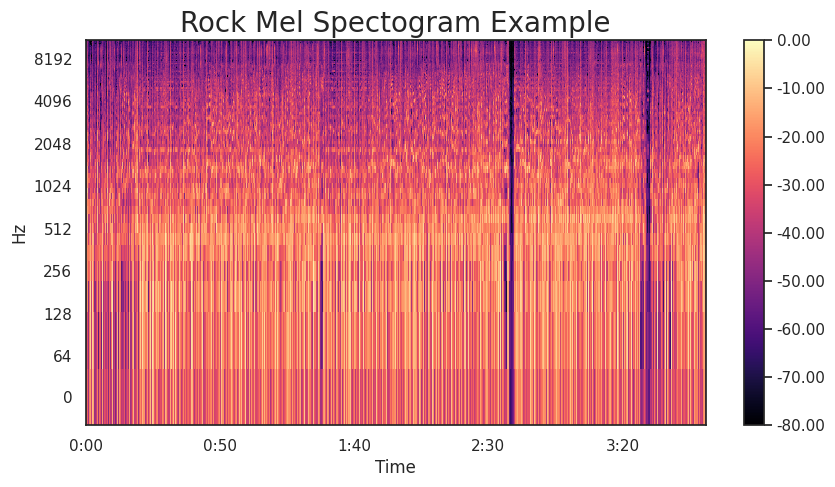

In [12]:
#Plot the mel spectrogram for audio track [7] - Afou sou to eipa
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(rock_S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Rock Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [27]:
pop_song = y_list[13]

In [28]:
pop_S_db_mel = mel_spec(pop_song)

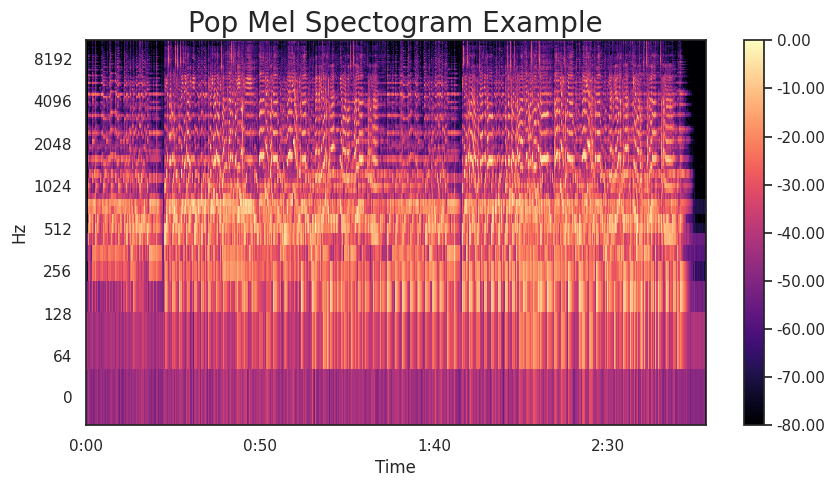

In [29]:
#Plot the mel spectrogram for track [13] - Zeise Opos Zeis
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(pop_S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Pop Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [41]:
entexno_song = y_list[1]

In [42]:
entexno_S_db_mel = mel_spec(entexno_song)

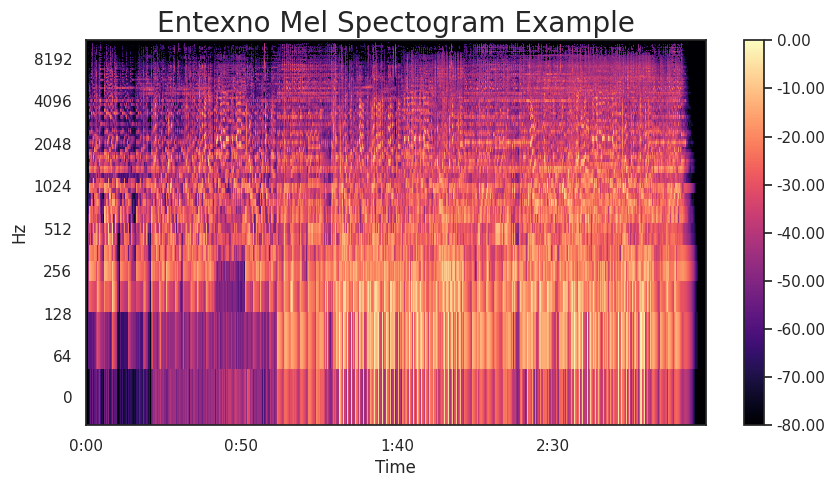

In [43]:
#Plot the mel spectrogram for track [1] - Adeioi topoi
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(entexno_S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Entexno Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()